In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def angle2loc(length, angle):
    return  (length * np.cos(angle), length * np.sin(angle))

In [4]:
def degree2radian(degree):
    return np.pi * (degree / 180)

In [5]:
def make_points(r, h, theta):
    middel_l = r + h
    side_l = np.sqrt(middel_l ** 2 + h ** 2)
    alpha = np.arcsin(np.sin(degree2radian(135)) / (side_l) * (np.sqrt(2) * h))
    
    A_point = angle2loc(r, theta)
    B_point = angle2loc(side_l, theta - alpha)
    C_point = angle2loc(r + 2*h, theta)
    D_point = angle2loc(side_l, theta + alpha)
    points = [A_point, B_point, C_point, D_point]
    return points

In [6]:
def draw_line(ax, p1 ,p2):
    x, y = zip(p1 ,p2)
    ax.plot(x, y)

In [7]:
def point_move(points, origin):
    new_points = []
    x , y = origin
    for p in points:
        new_points.append((p[0]+x, p[1]+y))
    
    return new_points

In [8]:
def draw_box(ax , points, origin=(0, 0)):
    """clockwise"""
    p1, p2, p3, p4 = point_move(points, origin)
    draw_line(ax, p1, p2)
    draw_line(ax, p2, p3)
    draw_line(ax, p3, p4)
    draw_line(ax, p4, p1)

In [9]:
def draw_circle(ax, r, origin=(0, 0)):
    circle = plt.Circle(origin, r, fill=False)
    ax.add_artist(circle)

In [10]:
def demo(r, h, origin=(0, 0), degree_step=20):
    fig, ax = plt.subplots()
    draw_circle(ax, r, origin)
    for degree in range(0, 360, degree_step):
        theta = degree2radian(degree)
        points = make_points(r, h , theta)
        draw_box(ax , points, origin)

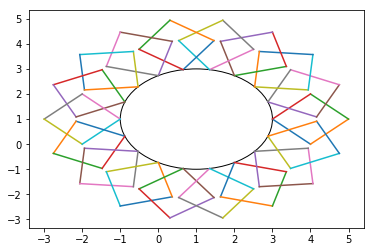

In [11]:
demo(2, 1, (1, 1))